# 회귀분석 10장 과제

> "작성 완료"

- toc: true
- branch: master
- badges: true
- comments: true
- author: 한재수
- categories: [R, statistics]

## 10.2

In [21]:
y = c(18, 17.4, 14.5, 14, 13.4, 24.4, 22.7, 12.7, 27.1,
       25.4,33.5, 35.6, 26.1, 36.8, 34.9, 43.6)
x1 = c(61, 72, 85, 84, 98, 53, 54, 89, 77, 88, 76, 59, 91, 65, 81, 51)
x2 = rep(c('A', 'B'), each = 8)

In [22]:
x2 = ifelse(x2 == 'A', 0, 1) 

In [23]:
x2

[1] 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1

In [24]:
m = lm(y~x1+x2)
summary(m)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7121 -1.5151 -0.1434  1.3539  4.3026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.76136    3.62542  10.967 6.10e-08 ***
x1          -0.30368    0.04689  -6.476 2.08e-05 ***
x2          15.43382    1.37079  11.259 4.47e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.74 on 13 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9197 
F-statistic: 86.95 on 2 and 13 DF,  p-value: 2.987e-08


$\hat{y}=39.76136-0.30368 x_1+15.43382 x_2$

In [25]:
m0 = lm(y~1)

In [31]:
anova(m0, m)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15,1403.10938,NA,NA,NA,NA
2,13,97.59762,2,1305.512,86.94707,2.98717e-08


`-` 에제 10.2에서는 회귀모델은 유의하나 교호작용항은 p값이 0.11252로 커서 유의하지 않았다

`-` 교호작용이 없는 모형에서는 모든 변수가 유의하다

`-` 또한 p-value가 거의 0이므로 추정된 회귀모델은 유의하다고 할 수 있다

## 10.4

In [65]:
x1 = c(2.5, 4.4, 4.5, 1.4, 4.7, 3.5, 2.5, 3.8)
y = c(65, 34, 40, 80, 30, 57, 72, 48)

### 1)

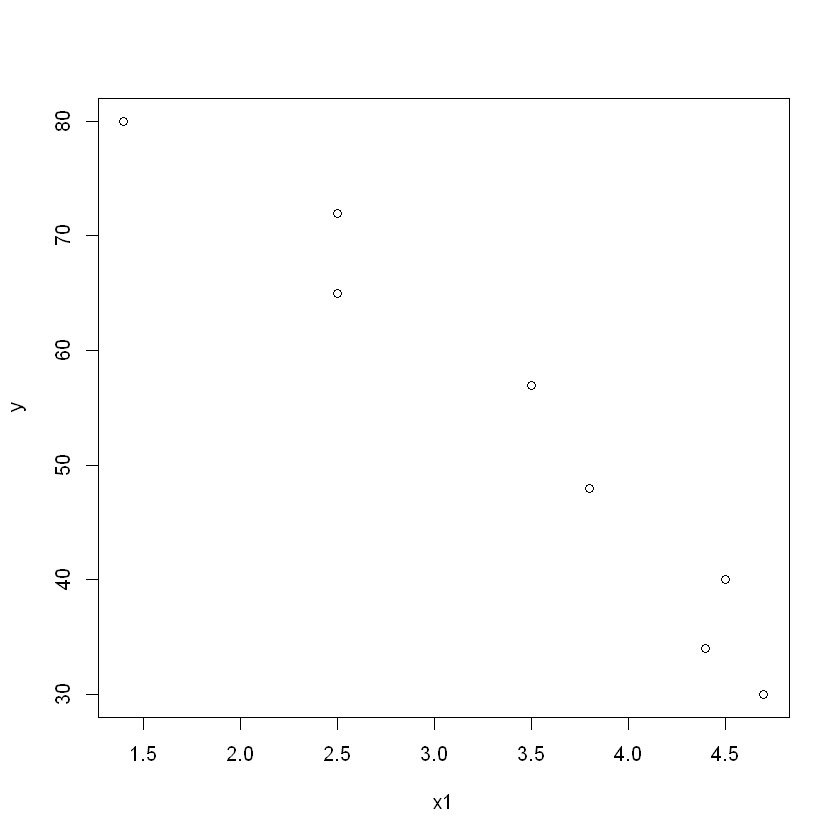

In [66]:
plot(y~x1)

`-` $x = 3.8$을 기준으로 2개의 구간으로 나누어 분석하는것이 좋아보인다

`-` $x=3.8$ 이전 데이터들의 기울기보다 $x=3.8$ 이후 데이터들의 기울기가 눈에 띄게 더 가파르고 이전 데이터는 넓은 범위에 존재하는 반면 이후에는 3개의 데이터가 밀집되어 있기 때문이다

### 2)

`-` 위와 같은 이유로 $x = 3.8$을 기준으로 나누는것이 좋아보인다

In [67]:
x2 = function(x) ifelse(x1 > 3.8, 1, 0)

In [68]:
x2_ = (x1-3.8)*x2(x1)

In [69]:
m = lm(y~x1+x2_)
summary(m)


Call:
lm(formula = y ~ x1 + x2_)

Residuals:
     1      2      3      4      5      6      7      8 
-2.421 -3.663  4.531 -1.462 -1.082  2.344  4.579 -2.826 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   99.333      5.907  16.817 1.36e-05 ***
x1           -12.765      2.046  -6.238  0.00155 ** 
x2_           -9.173      6.201  -1.479  0.19911    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.939 on 5 degrees of freedom
Multiple R-squared:  0.9668,	Adjusted R-squared:  0.9535 
F-statistic: 72.71 on 2 and 5 DF,  p-value: 0.0002015


$\hat{y}=99.333-12.765x_1-9.173x_{2\_}$

`-` $x{2\_}$에 대한 p-value가 0.19911로 0.05보다 크므로 영가설을 기각하지 못한다

`-` $\beta_2\neq 0$ 라고 할 수 없다 

## 10.5

In [86]:
y = c(15, 16, 18, 13, 19, 16, 15, 16, 17, 15,
      18, 17, 18, 19, 20, 16, 15, 19, 18, 16,
      20, 19, 21, 18, 19, 17, 18, 21, 20, 17,
      16, 17, 18, 17, 15, 15, 15, 18, 17, 16, 
      19, 21, 22, 23, 20, 18, 20, 21, 22, 19,
      24, 25, 23, 25, 25, 23, 24, 22, 26, 24)

x1 = rep(c(5, 10, 20, 5, 10, 20), each = 10)
x2 = rep(c('A', 'B'), each = 30)

In [87]:
x2 = ifelse(x2 == 'A', 0, 1)

In [88]:
x2

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

### 1)

`-` $y$는 불안도, $x_1$은 약의 복용량, $x_2$는 약의 종류

$y=\beta_0+\beta_1 x_1+\beta_2 x_2$

### 2)

In [96]:
m0 = lm(y~1)

In [95]:
m = lm(y~x1+x2)
summary(m)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3786 -1.0875 -0.0571  1.0857  3.7429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.55000    0.54711  24.766  < 2e-16 ***
x1           0.34143    0.03741   9.127 9.59e-13 ***
x2           2.80000    0.46658   6.001 1.43e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.807 on 57 degrees of freedom
Multiple R-squared:  0.6767,	Adjusted R-squared:  0.6654 
F-statistic: 59.66 on 2 and 57 DF,  p-value: 1.055e-14


$\hat{y}=13.55000+0.34143x_1+2.80000x_2$

In [97]:
anova(m0, m)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,575.7333,NA,NA,NA,NA
2,57,186.1286,2,389.6048,59.65627,1.055268e-14


`-` F통계량에 근거한 p-value가 거의 0이므로 회귀모형은 유의하다

### 3)

In [89]:
m = lm(y~x1+x2)
summary(m)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3786 -1.0875 -0.0571  1.0857  3.7429 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.55000    0.54711  24.766  < 2e-16 ***
x1           0.34143    0.03741   9.127 9.59e-13 ***
x2           2.80000    0.46658   6.001 1.43e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.807 on 57 degrees of freedom
Multiple R-squared:  0.6767,	Adjusted R-squared:  0.6654 
F-statistic: 59.66 on 2 and 57 DF,  p-value: 1.055e-14


$\hat{y}=13.55000+0.34143x_1+2.80000x_2$

`-` F-통계량에 근거한 p-value가 거의 0이므로 회귀모형은 유의하다

`-` A안정제보다 B안정제인 경우 실험용동물의 평균불안도가 2.8 더 높다

### 4)

In [90]:
x12 = x1*x2

In [91]:
m2 = lm(y~x1+x2+x12)
summary(m2)


Call:
lm(formula = y ~ x1 + x2 + x12)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2571 -1.2143 -0.1286  0.8893  3.4857 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 15.30000    0.59828  25.573  < 2e-16 ***
x1           0.19143    0.04523   4.233 8.65e-05 ***
x2          -0.70000    0.84609  -0.827    0.412    
x12          0.30000    0.06396   4.691 1.79e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.545 on 56 degrees of freedom
Multiple R-squared:  0.7679,	Adjusted R-squared:  0.7555 
F-statistic: 61.76 on 3 and 56 DF,  p-value: < 2.2e-16


`-` 교호작용항(x12)의 검정통계량에 근거한 p-value가 거의 0이므로 교호작용이 있다고 할 수 있따

## 10.7

In [165]:
x = c(1, 2, 3, 4, 5, 6)

In [166]:
p_mean = c(15/250, 20/252, 18/151, 25/204, 32/202, 40/195)

### 1)

In [167]:
logit = function(x) log(x/(1-x))

In [168]:
m_logit = lm(logit(p_mean)~x)
summary(m_logit)


Call:
lm(formula = logit(p_mean) ~ x)

Residuals:
        1         2         3         4         5         6 
-0.050412 -0.017289  0.166332 -0.069607 -0.038567  0.009543 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.96853    0.08945  -33.19 4.92e-06 ***
x            0.26741    0.02297   11.64 0.000311 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09609 on 4 degrees of freedom
Multiple R-squared:  0.9713,	Adjusted R-squared:  0.9642 
F-statistic: 135.5 on 1 and 4 DF,  p-value: 0.0003111


{% raw %}

`-` 로짓회귀식은 $\hat{{p}^{*}}=-2.96853+ 0.26741 x$ 이다

`-` 로지스틱 반응함수는 $\hat{y}=\cfrac{e^{-2.96853+ 0.26741x}}{1+e^{-2.96853+ 0.26741x}}$ 이다

{% endraw %}

### 2)

In [169]:
logistic = function(x) exp(-2.96853+0.26741*x) / (1+exp(-2.96853+0.26741*x))

In [180]:
newdata = data.frame(x = 4)
predict_ = predict(m_logit, newdata = newdata)
#predict_ 
logistic(predict_)

1 
0.02999369

`-` 문제의 확률은 $0.0299936908243327$ 이다

### 3)

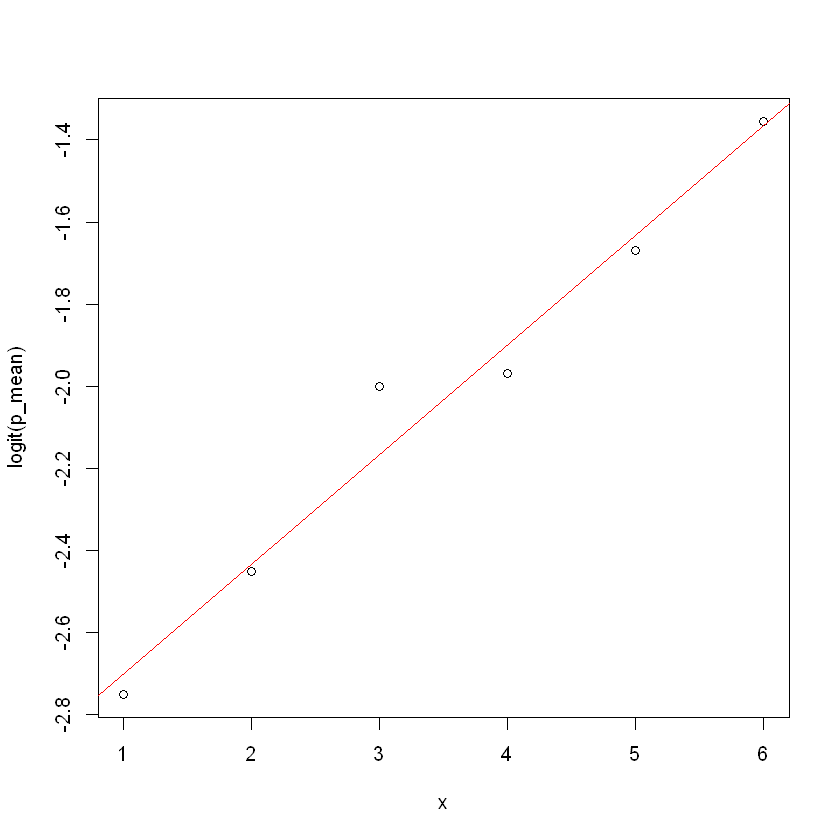

In [177]:
plot(x, logit(p_mean))
abline(m_logit, col = 'red')

In [179]:
anova(m_logit)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,1.25136337,1.251363368,135.5378,0.0003111466
Residuals,4,0.03693031,0.009232577,NA,NA


`-` 로지스틱 회귀모형에서 F통계량에 근거한 p-value가 0.000311로 매우 작으므로 회귀모형은 유의하다

`-` 로지스틱 반응함수를 적합시키는 것이 타당하다